In [1]:
!pip install -q librosa soundfile matplotlib numpy tqdm


In [2]:
# Path to your ZIP file inside Drive
zip_path = "/content/drive/MyDrive/irmas/archive.zip"

# Extract ZIP to a folder named "irmas"
extract_to = "/content/drive/MyDrive/irmas"

!unzip -q "$zip_path" -d "$extract_to"

print("Extraction completed.")


Extraction completed.


In [3]:
import os

DATASET_FOLDER = "/content/drive/MyDrive/irmas/IRMAS-TrainingData"

print("Dataset Folder:", DATASET_FOLDER)
print("Exists:", os.path.exists(DATASET_FOLDER))


Dataset Folder: /content/drive/MyDrive/irmas/IRMAS-TrainingData
Exists: True


In [4]:
audio_files = []

for root, _, files in os.walk(DATASET_FOLDER):
    for f in files:
        if f.lower().endswith(('.wav', '.mp3', '.flac', '.ogg')):
            audio_files.append(os.path.join(root, f))

print(f"Found {len(audio_files)} audio files\n")

# Show first 10
for p in audio_files[:10]:
    print(p)


Found 6705 audio files

/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__1.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__3.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__3.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/013__[cel][nod][cla]0025__1.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/013__[cel][nod][cla]0025__2.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/013__[cel][nod][cla]0025__3.wav
/content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/014__[cel][nod][cla]0041__1.wav


In [5]:
import librosa

sample_path = audio_files[0]
print("Loading:", sample_path)

audio, sr = librosa.load(sample_path, sr=None)  # load original sampling rate
print("Original sampling rate:", sr)
print("Original shape:", audio.shape)  # tells if stereo or mono


Loading: /content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__1.wav
Original sampling rate: 44100
Original shape: (132299,)


In [6]:
import numpy as np

if len(audio.shape) == 2:  # stereo → mono
    print("Stereo detected → converting to mono")
    audio = np.mean(audio, axis=1)

print("Final audio shape:", audio.shape)


Final audio shape: (132299,)


In [7]:
TARGET_SR = 16000
audio_16k = librosa.resample(audio, orig_sr=sr, target_sr=TARGET_SR)

print("Resampled to:", TARGET_SR)


Resampled to: 16000


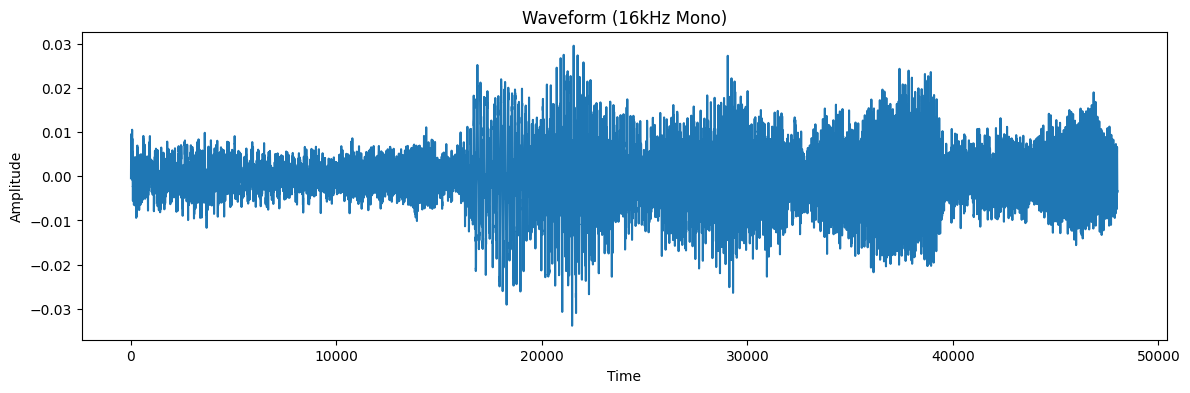

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(audio_16k)
plt.title("Waveform (16kHz Mono)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()
